In [1]:
# Load up some libraries
library(dplyr, warn.conflicts = FALSE)
library(ggplot2)
library(maps)
library(mapdata)

In [2]:
population_data_path_1 <- "county_population_1900_to_1990.csv" # County population data from 1900 to 1990
pop_data_1_df <- read.csv(file = population_data_path_1)
pop_data_1_df <- pop_data_1_df %>% filter(!grepl("\\d*000", fips)) # Get rid of state-wide data
pop_data_1_df <- pop_data_1_df[-1, ] # Get rid of nation-wide data
pop_data_1_df <- pop_data_1_df %>% select(-name)

In [3]:
head(pop_data_1_df)

,pop1900,pop1910,pop1920,pop1930,pop1940,pop1950,pop1960,pop1970,pop1980,pop1990,fips
2,17915,20038,18908,19694,20977,18186,18739,24460,32259,34222,1001
3,13194,18178,20730,28289,32324,40997,49088,59382,78556,98280,1003
4,35152,32728,32067,32425,32722,28892,24700,22543,24756,25417,1005
5,18498,22791,23144,20780,20155,17987,14357,13812,15723,16576,1007
6,23119,21456,25538,28020,29490,28975,25449,26853,36459,39248,1009
7,31944,30196,25333,20016,19810,16054,13462,11824,10596,11042,1011


In [4]:
population_data_path_2 <- "county_population_1970_to_2010.csv" # County population data from 1970 to 2010
pop_data_2_df <- read.csv(file = population_data_path_2)
pop_data_2_df <- pop_data_2_df %>% 
    filter(!grepl("\\d*000", fips)) %>% 
    filter(fips != county_fips)
pop_data_2_df <- pop_data_2_df[-1, ] # Get rid of nation-wide data
pop_data_2_df <- pop_data_2_df %>% 
    select(grep("^fips$|^pop\\d{4}$", names(pop_data_2_df))) %>%
    select(-pop2010, -pop2011, -pop2012, -pop2013, -pop2014)

In [5]:
head(pop_data_2_df, 10)

,fips,pop1970,pop1971,pop1972,pop1973,pop1974,pop1975,pop1976,pop1977,pop1978,...,pop2000,pop2001,pop2002,pop2003,pop2004,pop2005,pop2006,pop2007,pop2008,pop2009
2,1003,59382,60100,62400,64200,66100,67900,70200,72400,74500,...,141358,144988,148141,151707,156573,162564,168516,172815,176212,179878
3,1005,22543,23100,22900,23500,23400,24900,25600,24700,24500,...,29035,29223,29289,29480,29458,29452,29556,29736,29836,29737
4,1007,13812,13900,14100,14700,14400,14800,14800,15300,15400,...,19936,20942,20983,21037,21208,21375,21285,21485,21589,21587
5,1009,26853,27800,29300,30400,31500,32200,33000,34200,34800,...,51181,51999,52775,53726,54469,55035,55978,56866,57794,58345
6,1011,11824,11400,11400,11300,11100,11100,11100,11000,11000,...,11604,11381,11261,11305,11038,10975,10739,10966,10921,10985
7,1013,22007,21800,21500,21200,21200,21200,21400,20900,20900,...,21313,21036,20607,20536,20476,20338,20231,20243,20171,19964
8,1015,103092,103600,103800,105000,105900,107000,112800,112800,116500,...,111342,111019,110860,111378,111615,112081,112453,112808,113422,114081
9,1017,36356,36300,36100,37000,37500,37500,37900,38400,38700,...,36593,36281,35952,35626,35387,35173,34822,34731,34473,34320
10,1019,15606,16500,16900,17200,17700,18100,18600,18400,18600,...,24053,24078,24143,24159,24291,24268,24531,24474,24413,24448
11,1021,25180,25600,26400,27200,27900,28600,29100,29300,29900,...,39781,40030,40460,40776,41170,41510,41821,42362,42696,42971


In [6]:
voter_turnout_path <- "turnout_rates_1980_2014.csv"
voter_turnout_df <- read.csv(voter_turnout_path, skip = 1)
voter_turnout_df <- voter_turnout_df[-1, ]
voter_turnout_df <- voter_turnout_df %>%
    select(Year, X, Voting.Eligible.Population..VEP.)
colnames(voter_turnout_df) <- c("Year", "State", "VEP")
voter_turnout_df$State <- tolower(voter_turnout_df$State)
voter_turnout_df$VEP <- as.numeric(gsub(",", "", voter_turnout_df$VEP))

In [7]:
head(voter_turnout_df)

,Year,State,VEP
2,2014,alabama,3588783
3,2014,alaska,520562
4,2014,arizona,4510186
5,2014,arkansas,2117881
6,2014,california,24440416
7,2014,colorado,3800664


In [8]:
election_data_path = "US_Presidential_Election_1960_2016/data/processed/full-us-presidential-counties-1960-2016.tsv"
full_election_df <- read.table(file = election_data_path, sep = "\t", header = TRUE, quote = "")
full_election_df$state.name <- as.character(full_election_df$state.name)
full_election_df$county.name <- as.character(full_election_df$county.name)
full_election_df <- full_election_df %>%
    select(year, county.name, state.name, party, vote.percent, vote.count)

In [9]:
head(full_election_df)

year,county.name,state.name,party,vote.percent,vote.count
1960,abbeville,south carolina,D,78.4,3064
1960,abbeville,south carolina,O,0.0,0
1960,abbeville,south carolina,R,21.6,845
1964,abbeville,south carolina,D,65.0,2689
1964,abbeville,south carolina,O,0.0,0
1964,abbeville,south carolina,R,35.0,1448


In [10]:
demographics_df <- inner_join(full_election_df, voter_turnout_df, by = c("year" = "Year", "state.name" = "State"))
demographics_df <- demographics_df %>%
    filter(party == "R") %>%
    mutate(county.proportion = vote.count / VEP * 100)

In [11]:
sentiment_df <- demographics_df %>% 
    group_by(year) %>%
    summarize(national.sentiment = mean(county.proportion))

In [12]:
demographics_df <- inner_join(demographics_df, sentiment_df, by = "year") 
demographics_df <- demographics_df %>% 
    mutate(county.sentiment = county.proportion / national.sentiment) %>%
    select(year, state.name, county.name, county.sentiment) %>%
    mutate(full.name = paste(state.name, county.name, sep = " - "))

In [13]:
head(demographics_df, 10)

year,state.name,county.name,county.sentiment,full.name
1980,south carolina,abbeville,0.2334300,south carolina - abbeville
1984,south carolina,abbeville,0.3005712,south carolina - abbeville
1988,south carolina,abbeville,0.3245284,south carolina - abbeville
1992,south carolina,abbeville,0.3506537,south carolina - abbeville
1996,south carolina,abbeville,0.3179338,south carolina - abbeville
2000,south carolina,abbeville,0.3424929,south carolina - abbeville
2004,south carolina,abbeville,0.3433356,south carolina - abbeville
2008,south carolina,abbeville,0.4000848,south carolina - abbeville
2012,south carolina,abbeville,0.3659792,south carolina - abbeville
1980,louisiana,acadia,0.8651803,louisiana - acadia


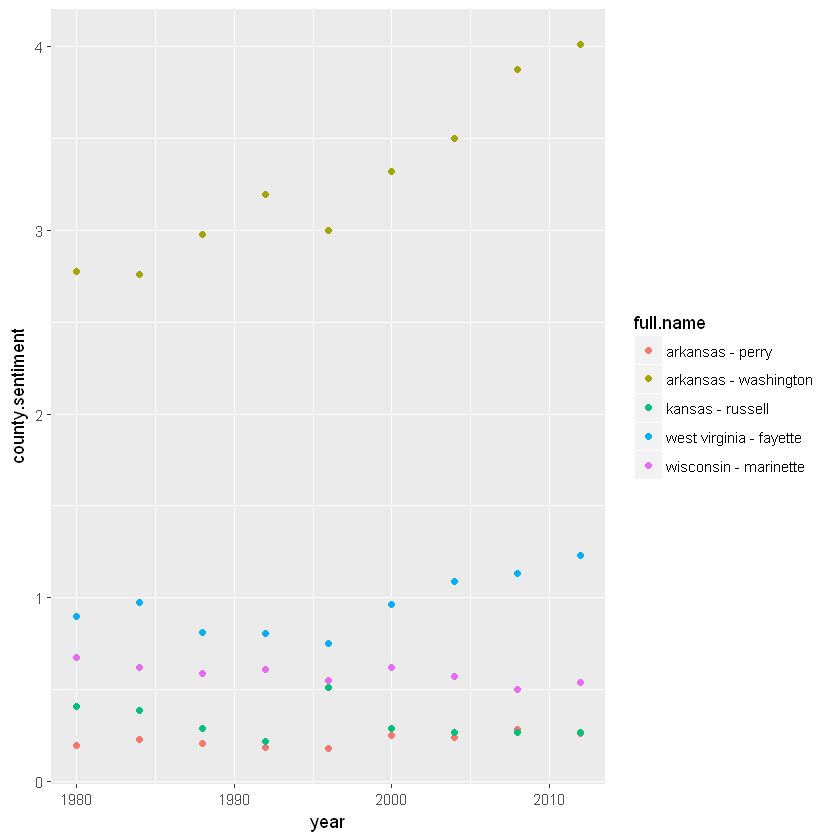

In [99]:
plot_df <- demographics_df %>%
    filter(full.name %in% sample(full.name, 5))
ggplot(data = plot_df, aes(x = year, y = county.sentiment, colour = full.name)) + geom_point()

In [52]:
year_to_select <- 1980

data_to_plot_df <- demographics_df %>%
    filter(year == year_to_select) %>%
    select(state.name, county.name, county.sentiment)

data_to_plot_df$breaks <- cut(data_to_plot_df$county.sentiment, 
                       breaks <- c(0, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.75, 1, 2, 3, 4, 5, 1000),
                       lebels <- c("< 0.10", "0.10 - 0.15", "0.15 - 0.20", "0.20 - 0.30",
                                   "0.30 - 0.40","0.40 - 0.50", "0.50 - 0.75", "0.75 - 1",
                                   "1 - 2", "2 - 3", "3 - 4", "4 - 5", "> 5"))

states <- map_data("state")
counties <- map_data("county")

spatial_data_df = inner_join(counties, data_to_plot_df, 
                        by = c("subregion" = "county.name", "region" = "state.name"))

In [53]:
head(spatial_data_df)

long,lat,group,order,region,subregion,county.sentiment,breaks
-86.50517,32.34920,1,1,alabama,autauga,0.4966914,0.40 - 0.50
-86.53382,32.35493,1,2,alabama,autauga,0.4966914,0.40 - 0.50
-86.54527,32.36639,1,3,alabama,autauga,0.4966914,0.40 - 0.50
-86.55673,32.37785,1,4,alabama,autauga,0.4966914,0.40 - 0.50
-86.57966,32.38357,1,5,alabama,autauga,0.4966914,0.40 - 0.50
-86.59111,32.37785,1,6,alabama,autauga,0.4966914,0.40 - 0.50


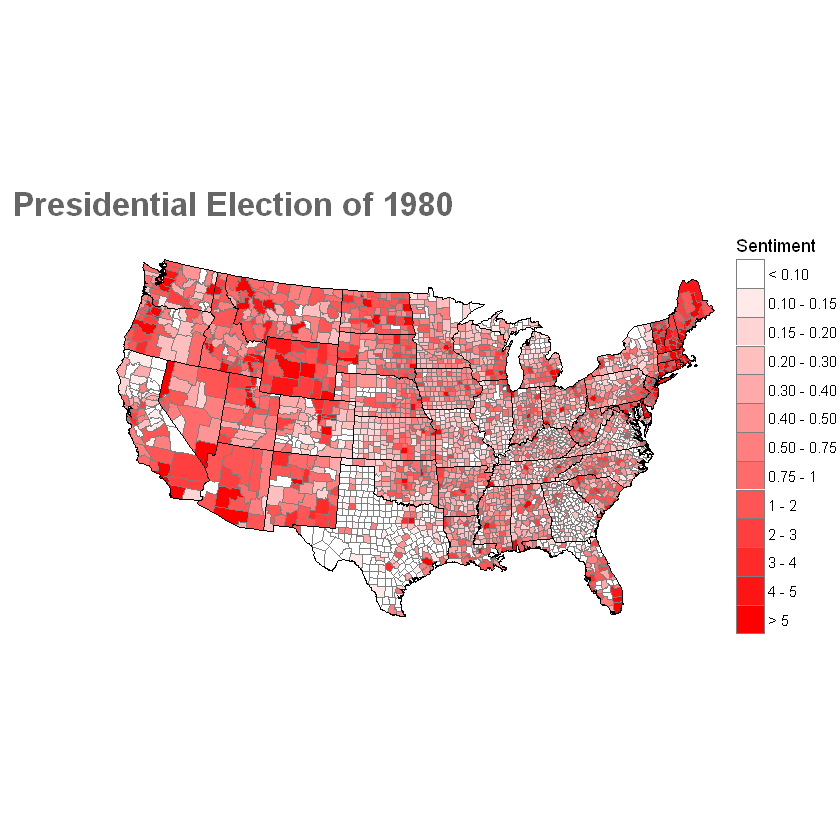

In [103]:
ggplot() +
    coord_map("albers", lat0 = 37.5, lat1 = 29.5) + 
    geom_polygon(data = spatial_data_df, 
                 aes(x = long, y = lat, group = group, fill = breaks),
                 color = "gray50", size = 0.05) +
    scale_fill_manual(name = "Sentiment", values = colorRampPalette(c("white", "red"))(13)) +
    geom_polygon(data = states, 
                 aes(x = long, y = lat, group = group), 
                 fill = NA, color = "black") +
    theme(plot.title = element_text(color="#666666", face="bold", size=20), 
          axis.text = element_blank(), 
          axis.line = element_blank(), 
          axis.ticks = element_blank(),
          axis.title = element_blank(),
          legend.position = c(0.95, 0.5),
          panel.border = element_blank(), 
          panel.grid = element_blank(),
          panel.background = element_blank()) +
    ggtitle(paste("Presidential Election of", year_to_select))